# data source: 
#### https://www.heywhale.com/mw/project/60ceb85d056f570017c0ae42/dataset 
### the datasets are defects, all user_id and order_id are unique.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from pyecharts import options as opts
from pyecharts.charts import Line, Bar, Pie, Grid

In [206]:
#load data 
df = pd.read_csv(r'D:\Data\Python\ElectricsSales.csv')
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,2020-04-24 11:50:39 UTC,22900000010000000000,1.520000e+18,2.270000e+18,electronics.tablet,samsung,162.01,1515915625441990000,24,Female,Hainan
1,2020-04-24 11:50:39 UTC,22900000200000000000,1.520000e+18,2.270000e+18,electronics.tablet,samsung,162.01,1515915625441990000,24,Female,Hainan
2,2020-04-24 14:37:43 UTC,22900000390000000000,2.270000e+18,2.270000e+18,electronics.audio.headphone,huawei,77.52,1515915625447870000,38,Female,Beijing
3,2020-04-24 14:37:43 UTC,22900000580000000000,2.270000e+18,2.270000e+18,electronics.audio.headphone,huawei,77.52,1515915625447870000,38,Female,Beijing
4,2020-04-24 19:16:21 UTC,22900000770000000000,2.270000e+18,2.270000e+18,NaN,karcher,217.57,1515915625443140000,32,Female,Guangdong


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     564169 non-null  object 
 1   order_id       564169 non-null  object 
 2   product_id     564169 non-null  float64
 3   category_id    564169 non-null  float64
 4   category_code  434799 non-null  object 
 5   brand          536945 non-null  object 
 6   price          564169 non-null  float64
 7   user_id        564169 non-null  int64  
 8   age            564169 non-null  int64  
 9   sex            564169 non-null  object 
 10  local          564169 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 47.3+ MB


#### 1. clean data

In [208]:
#### Check null
df.isnull().sum()

event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
dtype: int64

In [209]:
# fill null with 'missing'
df.fillna('missing', inplace =True)
df.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
dtype: int64

In [210]:
# convert datatype
df['event_time'] = pd.to_datetime(df['event_time'].str[:19], format ='%Y-%m-%d %H:%M:%S') # de-utc

# Month
df['month']=df['event_time'].dt.month
# dayofweek
df['dayofweek'] = df['event_time'].dt.dayofweek
# hour
df['hour']=df['event_time'].dt.hour


In [211]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,month,dayofweek,hour
0,2020-04-24 11:50:39,22900000010000000000,1.520000e+18,2.270000e+18,electronics.tablet,samsung,162.01,1515915625441990000,24,Female,Hainan,4,4,11
1,2020-04-24 11:50:39,22900000200000000000,1.520000e+18,2.270000e+18,electronics.tablet,samsung,162.01,1515915625441990000,24,Female,Hainan,4,4,11
2,2020-04-24 14:37:43,22900000390000000000,2.270000e+18,2.270000e+18,electronics.audio.headphone,huawei,77.52,1515915625447870000,38,Female,Beijing,4,4,14
3,2020-04-24 14:37:43,22900000580000000000,2.270000e+18,2.270000e+18,electronics.audio.headphone,huawei,77.52,1515915625447870000,38,Female,Beijing,4,4,14
4,2020-04-24 19:16:21,22900000770000000000,2.270000e+18,2.270000e+18,missing,karcher,217.57,1515915625443140000,32,Female,Guangdong,4,4,19


In [212]:
df['order_id'].nunique()

564169

In [213]:
df.user_id.nunique()

564163

In [214]:
df.duplicated().sum()

0

In [215]:
# de-duplication
df = df.drop_duplicates()

In [216]:
df.info() #6853 duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564169 entries, 0 to 564168
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     564169 non-null  datetime64[ns]
 1   order_id       564169 non-null  object        
 2   product_id     564169 non-null  float64       
 3   category_id    564169 non-null  float64       
 4   category_code  564169 non-null  object        
 5   brand          564169 non-null  object        
 6   price          564169 non-null  float64       
 7   user_id        564169 non-null  int64         
 8   age            564169 non-null  int64         
 9   sex            564169 non-null  object        
 10  local          564169 non-null  object        
 11  month          564169 non-null  int64         
 12  dayofweek      564169 non-null  int64         
 13  hour           564169 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(5

In [217]:
# delete price = 0
len(df[df['price']==0])  #39 rows, no effect to whole datasets, drop

df = df[df['price'] !=0]

In [221]:
user_record = df.groupby('user_id')['order_id'].count().sort_values(ascending = False)
df

# 2.times series analysis

#### 1. monthly orders, customer number, sales volumn

In [218]:
order_month = df.groupby('month')['order_id'].nunique()
customer_month = df.groupby('month')['user_id'].nunique()# no enough order_id and customer_id in raw data
sales_vol = df.groupby('month')['price'].sum()
index_m =['{}'.format(i) for i in range(1,12)]

In [219]:
line1 = ( Line()
            .add_xaxis(index_m)
            .add_yaxis('order_month', order_month.values.tolist(), label_opts= opts.LabelOpts(is_show= False))
            .set_global_opts(title_opts = opts.TitleOpts(title = 'monthly orders'), legend_opts =opts.LegendOpts(pos_left ='17%')))

line2 = ( Line()
            .add_xaxis(index_m)
            .add_yaxis('customer_month', customer_month.values.tolist(), label_opts= opts.LabelOpts(is_show= False))
            .set_global_opts(title_opts = opts.TitleOpts(title = 'customer month', pos_left='32%'), legend_opts =opts.LegendOpts(pos_left ='50%')))

line3 = ( Line()
            .add_xaxis(index_m)
            .add_yaxis('sales_vol', sales_vol.values.tolist(), label_opts= opts.LabelOpts(is_show= False))
            .set_global_opts(title_opts = opts.TitleOpts(title = 'sales vol', pos_left='70%'), legend_opts =opts.LegendOpts(pos_left ='80%')))

grid1 = (
        Grid()
        .add(line1, grid_opts=opts.GridOpts(pos_right='65%'))
        .add(line2, grid_opts=opts.GridOpts(pos_left='40%',pos_right='35%'))
        .add(line3, grid_opts=opts.GridOpts(pos_left='72%'))
    )

grid1.render_notebook()

In [220]:
order_h=df.groupby('hour')['order_id'].nunique()
sale_h=df.groupby('hour')['price'].sum()
index_h=['{}'.format(i) for i in range(0, 23)]

line4=(
    Line()
    .add_xaxis(index_h)
    .add_yaxis('order_hour',order_h.values.tolist(), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(yaxis_opts=opts.AxisOpts(name = 'orderNumber'))
    .extend_axis(yaxis=opts.AxisOpts(name='SalesAmount',position='right'))
)

bar1=(
    Bar()
    .add_xaxis(index_h)
    .add_yaxis('orders per hour',sale_h.values.tolist(), label_opts=opts.LabelOpts(is_show=False),yaxis_index=1)
)

line4.overlap(bar1)
line4.render_notebook()


# 3. customer analysis

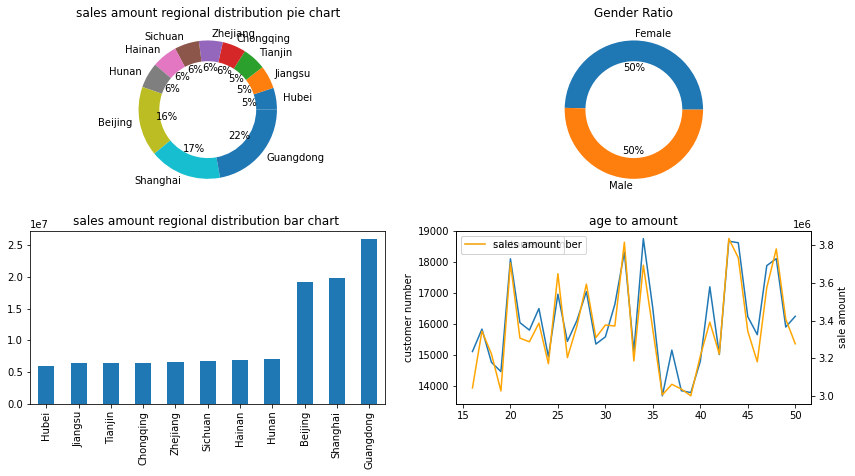

In [224]:
fig,axs = plt.subplots(2,2,figsize=(14,14))
df.groupby('local')['price'].sum().sort_values().plot(kind='bar',ax=axs[1,0],xlabel='',title='sales amount regional distribution bar chart ')
df.groupby('local')['price'].sum().sort_values().plot(kind = 'pie',ylabel='',ax=axs[0,0],autopct='%.0f%%',wedgeprops={'width':0.3},title='sales amount regional distribution pie chart')
df.groupby('sex')['user_id'].nunique().plot(kind='pie',title='Gender Ratio',ax=axs[0,1],ylabel='',autopct='%.0f%%',wedgeprops={'width':0.3})
ax1 = df.groupby('age')['user_id'].nunique().rename('customer number').plot(title='age to amount',ylabel='customer number',ax=axs[1,1],xlabel='',legend=1)
df.groupby('age')['price'].sum().rename('sales amount').plot(ax=ax1.twinx(),color='orange',figsize=(14,7),ylabel='sale amount',legend=True,xlabel='').legend(loc=2)